In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Ganesh Jagzap\Downloads\Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


The Annual Income($) columns has several unique values so i whould be deficult to analysis , so i will going to add new column which is Income Group which is in a proper range

In [4]:
income_ranges = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000]
labels = ['0-25000', '25001-50000', '50001-75000', '75001-100000', '100001-125000', '125001-150000', '150001-175000', '175001-200000']

# Create the income group column
df['Income Group'] = pd.cut(df['Annual Income ($)'], bins=income_ranges, labels=labels, right=False)


The Age columns also have several age values so it whould be deficult to analyse , so i will going to add new column whish is Age Group which is in proper range

In [5]:
age_ranges = [18, 26, 36, 46, 56, 66, 76,86,96, 101]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75','76-85', '86-95','96+']

# Create the age group column
df['Age Group'] = pd.cut(df['Age'], bins=age_ranges, labels=labels, right=False)


In [6]:
df['Age'].max()

99

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Income Group,Age Group
0,1,Male,19,15000,39,Healthcare,1,4,0-25000,18-25
1,2,Male,21,35000,81,Engineer,3,3,25001-50000,18-25
2,3,Female,20,86000,6,Engineer,1,1,75001-100000,18-25
3,4,Female,23,59000,77,Lawyer,0,2,50001-75000,18-25
4,5,Female,31,38000,40,Entertainment,2,6,25001-50000,26-35


In [8]:
df.tail()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Income Group,Age Group
1995,1996,Female,71,184387,40,Artist,8,7,175001-200000,66-75
1996,1997,Female,91,73158,32,Doctor,7,7,50001-75000,86-95
1997,1998,Male,87,90961,14,Healthcare,9,2,75001-100000,86-95
1998,1999,Male,77,182109,4,Executive,7,2,175001-200000,76-85
1999,2000,Male,90,110610,52,Entertainment,5,2,100001-125000,86-95


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              2000 non-null   int64   
 1   Gender                  2000 non-null   object  
 2   Age                     2000 non-null   int64   
 3   Annual Income ($)       2000 non-null   int64   
 4   Spending Score (1-100)  2000 non-null   int64   
 5   Profession              1965 non-null   object  
 6   Work Experience         2000 non-null   int64   
 7   Family Size             2000 non-null   int64   
 8   Income Group            2000 non-null   category
 9   Age Group               1668 non-null   category
dtypes: category(2), int64(6), object(2)
memory usage: 129.8+ KB


In [10]:
pd.isnull(df).sum()

CustomerID                  0
Gender                      0
Age                         0
Annual Income ($)           0
Spending Score (1-100)      0
Profession                 35
Work Experience             0
Family Size                 0
Income Group                0
Age Group                 332
dtype: int64

### There are total 2000 rows in our dataset in that 35 rows having null value ,as we can see null value's amout is very less so we can drop null values

In [11]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1638 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              1638 non-null   int64   
 1   Gender                  1638 non-null   object  
 2   Age                     1638 non-null   int64   
 3   Annual Income ($)       1638 non-null   int64   
 4   Spending Score (1-100)  1638 non-null   int64   
 5   Profession              1638 non-null   object  
 6   Work Experience         1638 non-null   int64   
 7   Family Size             1638 non-null   int64   
 8   Income Group            1638 non-null   category
 9   Age Group               1638 non-null   category
dtypes: category(2), int64(6), object(2)
memory usage: 119.1+ KB


In [13]:
pd.isnull(df).sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
Income Group              0
Age Group                 0
dtype: int64

# EDA

## Gender

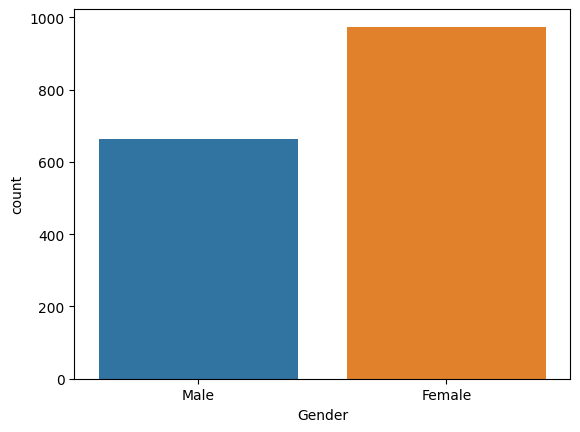

In [14]:
ax = sns.countplot(x = 'Gender',data = df)

# for bars in ax.containers:
#     ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

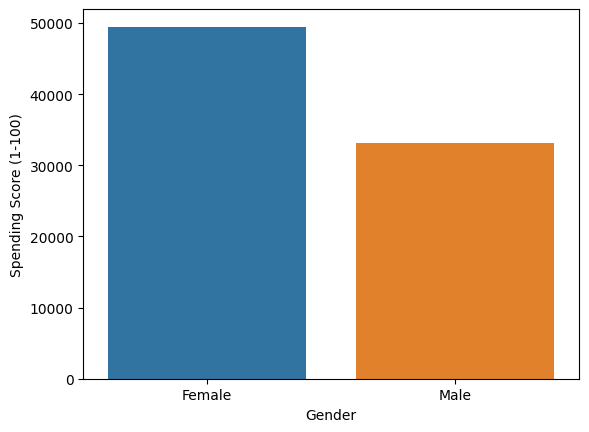

In [15]:
sales_gen = df.groupby(['Gender'], as_index=False)['Spending Score (1-100)'].sum().sort_values(by='Spending Score (1-100)', ascending=False)

sns.barplot(x = 'Gender',y= 'Spending Score (1-100)' ,data = sales_gen)

## Insights from Gender
#### Female group is spendig more at shop as compare to male

# Age

<Axes: xlabel='Age Group', ylabel='Spending Score (1-100)'>

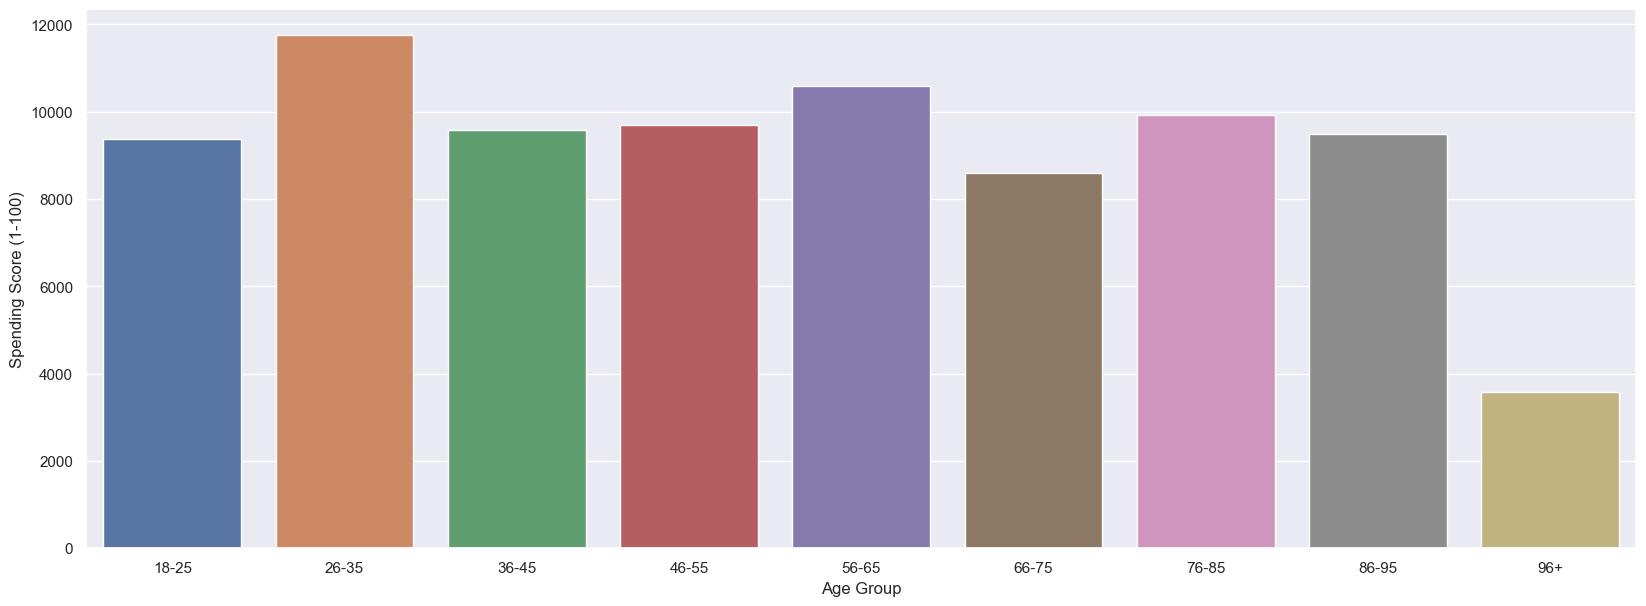

In [16]:
sns.set(rc={'figure.figsize':(20,7)})
sales_gen = df.groupby(['Age Group'], as_index=False)['Spending Score (1-100)'].sum().sort_values(by='Spending Score (1-100)', ascending=False)

sns.barplot(x = 'Age Group',y= 'Spending Score (1-100)' ,data = sales_gen)


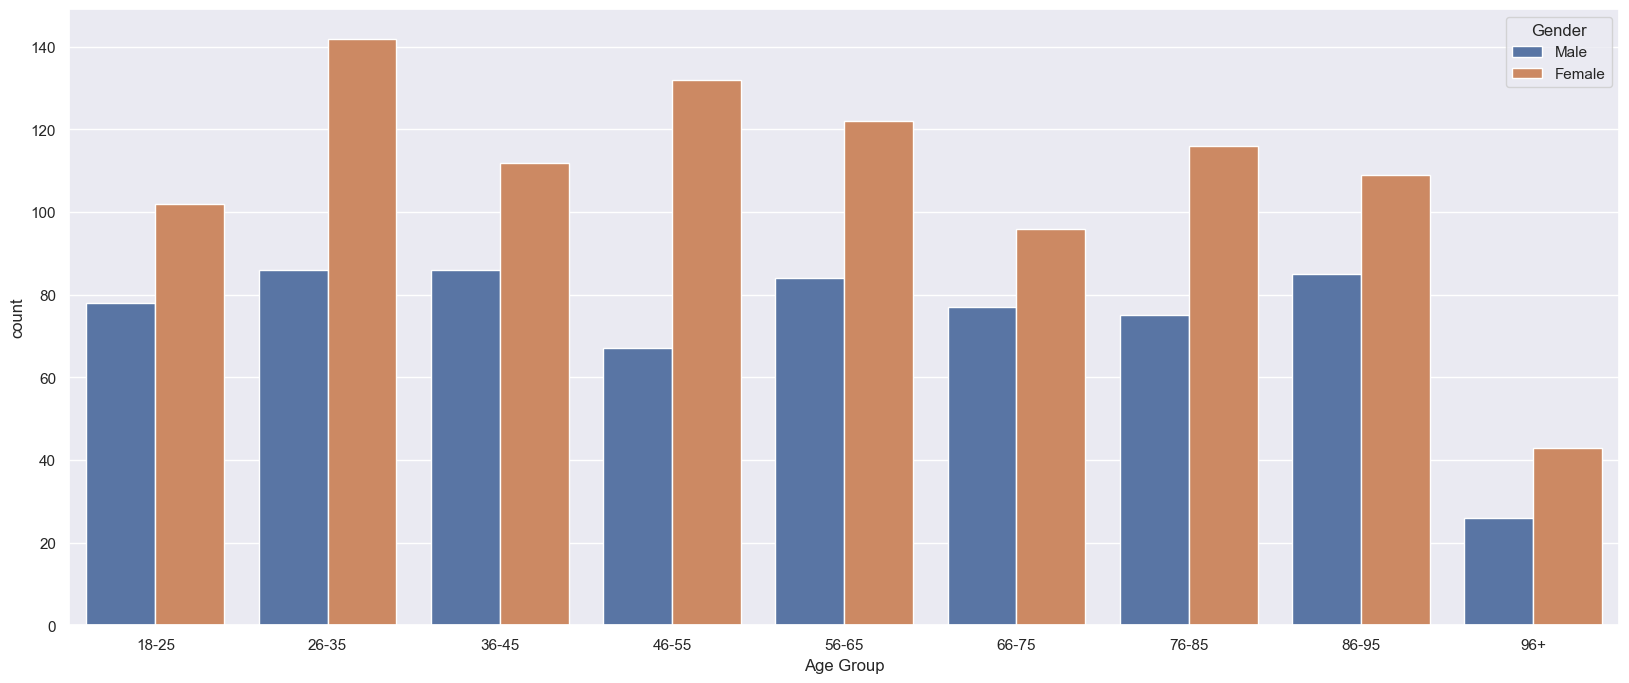

In [17]:
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(data = df, x = 'Age Group',hue='Gender')


## Insights from above graph
#### Most of the buyers from age group 26-35 females 

## Income

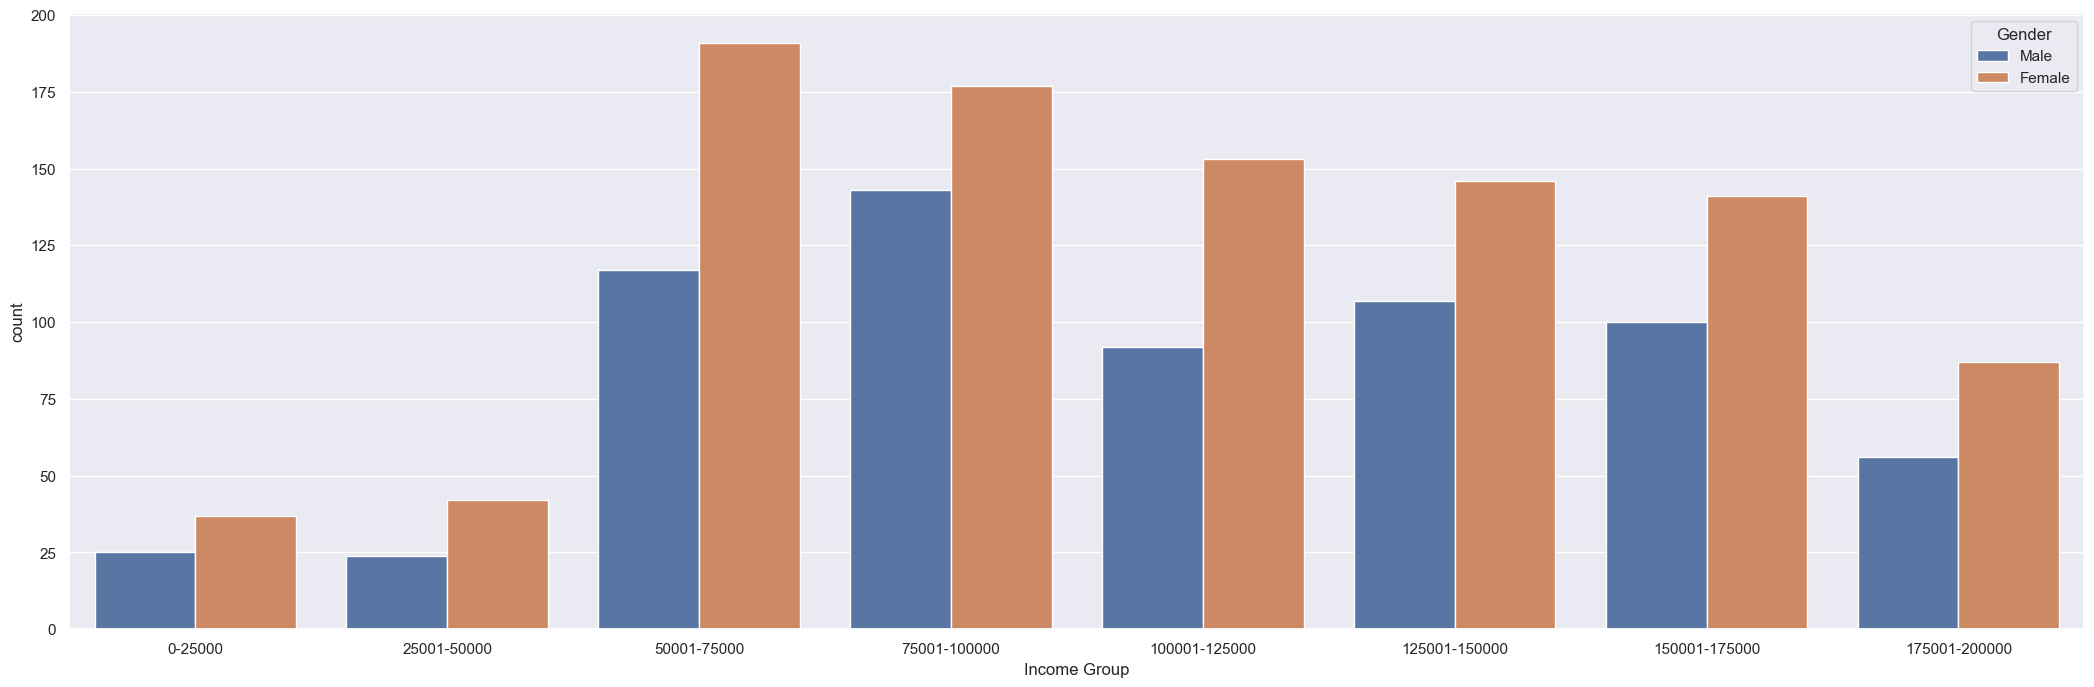

In [18]:
sns.set(rc={'figure.figsize':(26,8)})
ax = sns.countplot(data = df, x = 'Income Group', hue = 'Gender')



<Axes: xlabel='Income Group', ylabel='Spending Score (1-100)'>

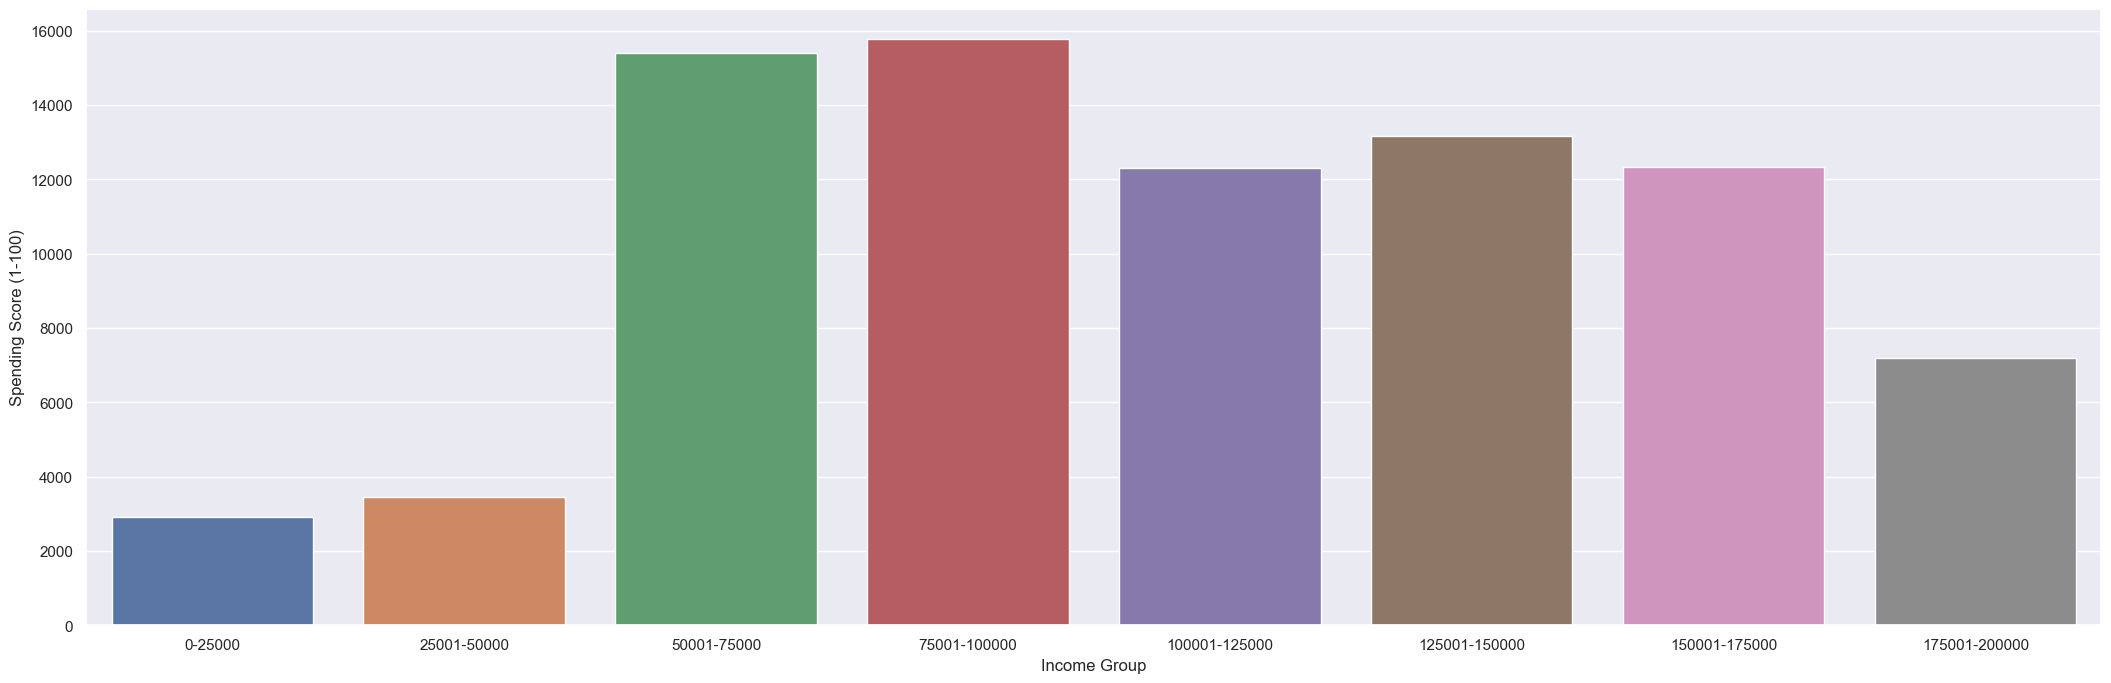

In [19]:
sales_gen = df.groupby(['Income Group'], as_index=False)['Spending Score (1-100)'].sum().sort_values(by='Spending Score (1-100)', ascending=False)

sns.barplot(x = 'Income Group',y= 'Spending Score (1-100)' ,data = sales_gen)

## Insights from above graph
#### we can see that those have income between 50001-75000  they have maximum purchase but those who have income between 75001-100000 they are spendig more 

## Profession

<Axes: xlabel='Profession', ylabel='Spending Score (1-100)'>

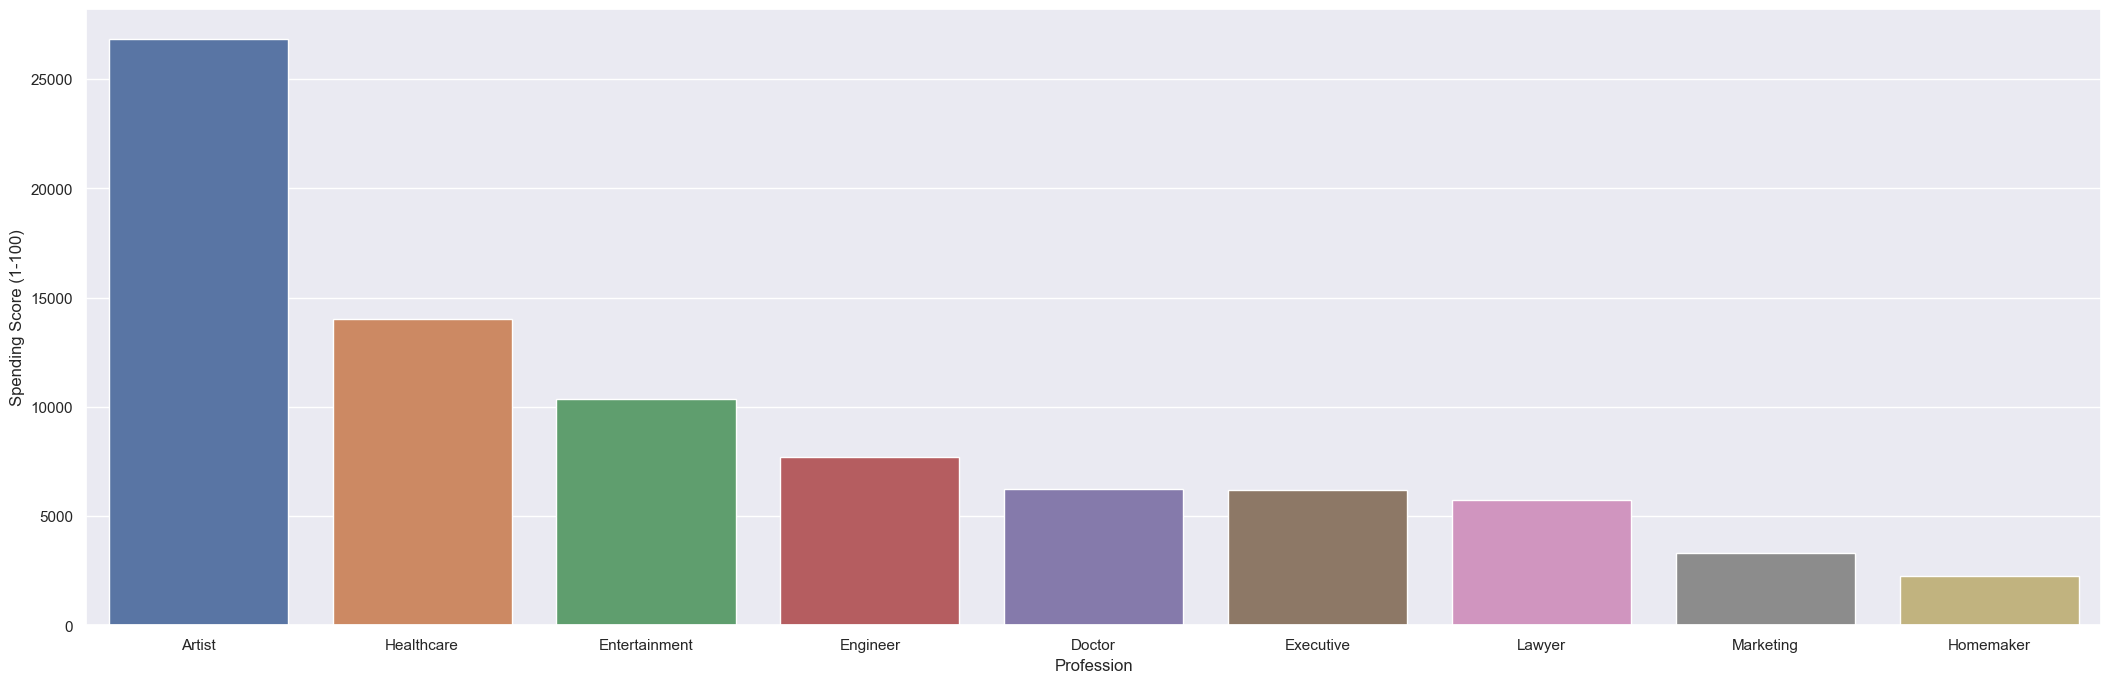

In [20]:
sales_gen = df.groupby(['Profession'], as_index=False)['Spending Score (1-100)'].sum().sort_values(by='Spending Score (1-100)', ascending=False)

sns.barplot(x = 'Profession',y= 'Spending Score (1-100)' ,data = sales_gen)

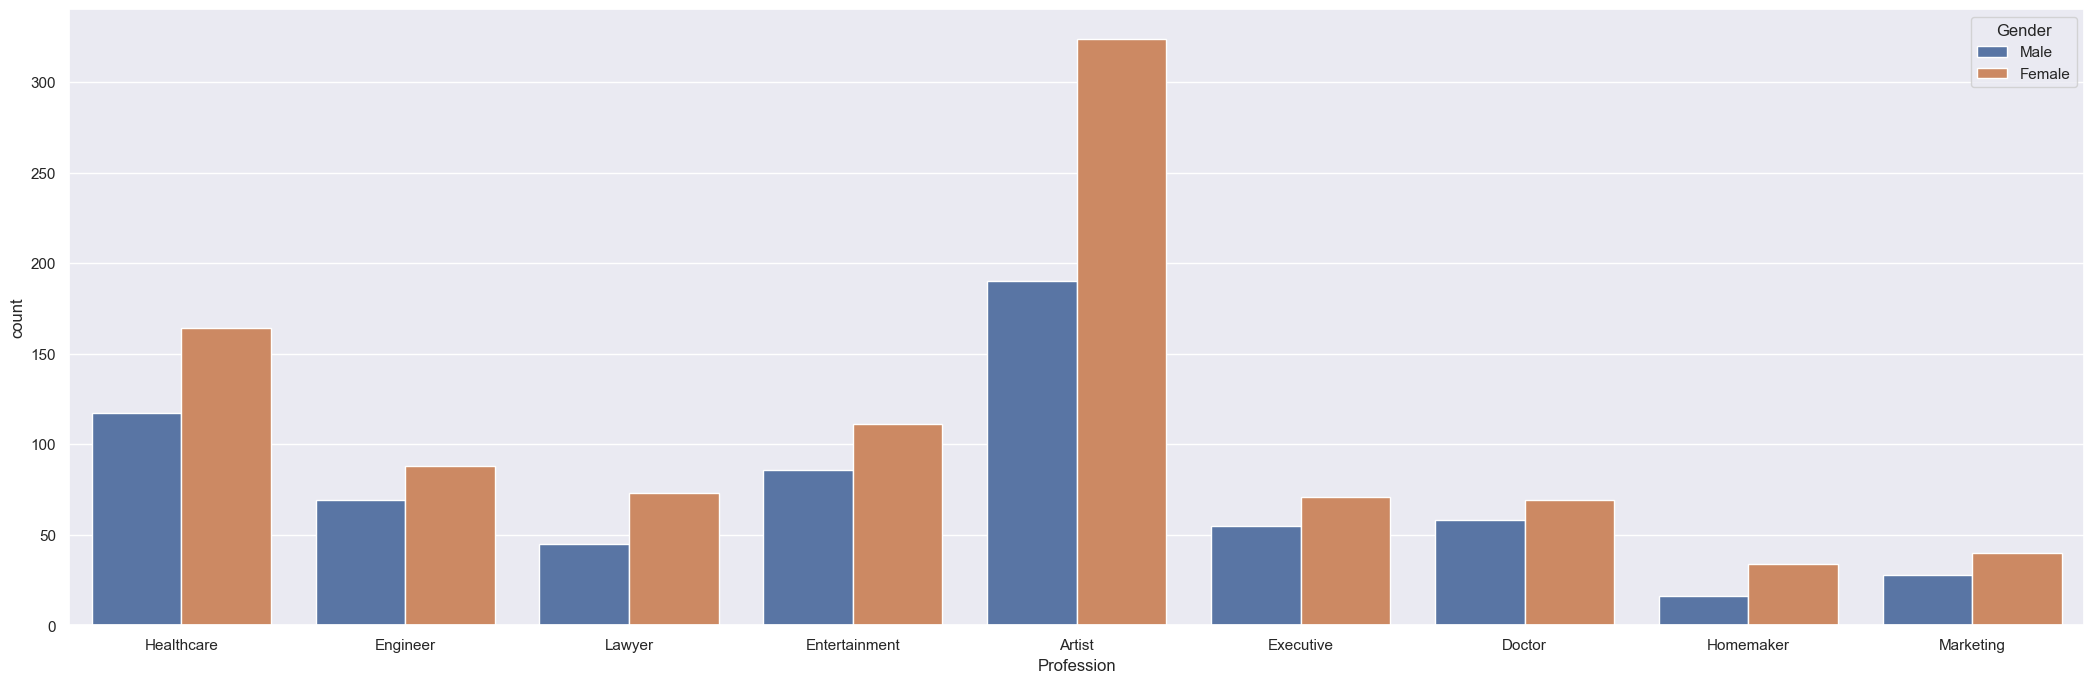

In [21]:
sns.set(rc={'figure.figsize':(26,8)})
ax = sns.countplot(data = df, x = 'Profession', hue = 'Gender')

## Insights from abouve graph
#### Those who are belong to profession Artist and female they are spending more , then Healthcare and Entertainment 

## Family size

<Axes: xlabel='Family Size', ylabel='Spending Score (1-100)'>

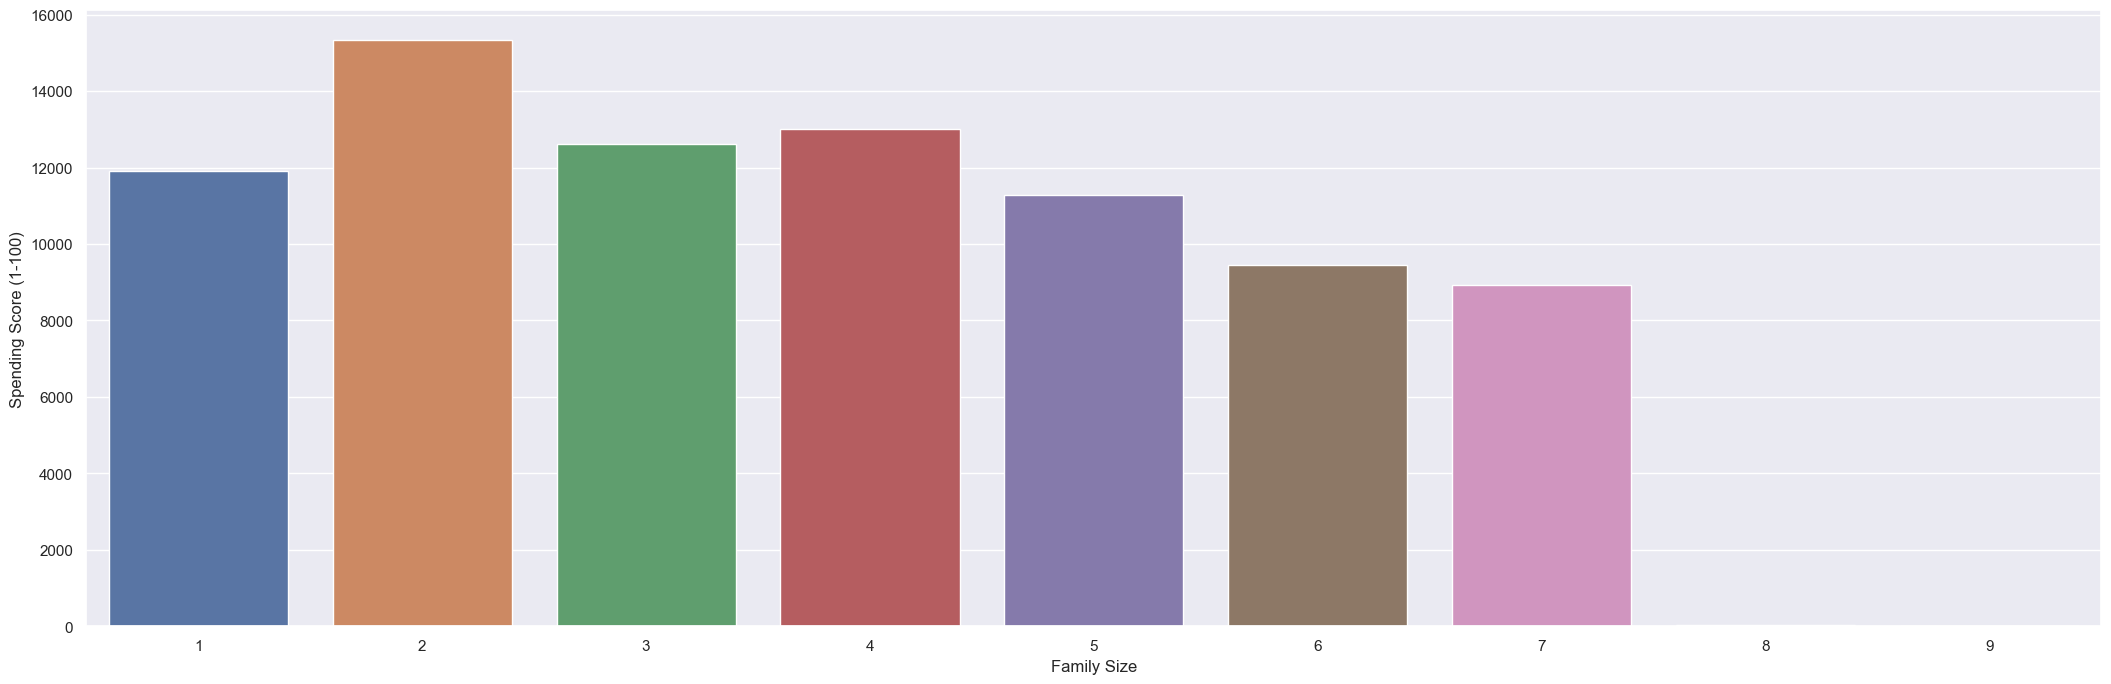

In [22]:
sales_gen = df.groupby(['Family Size'], as_index=False)['Spending Score (1-100)'].sum().sort_values(by='Spending Score (1-100)', ascending=False)

sns.barplot(x = 'Family Size',y= 'Spending Score (1-100)' ,data = sales_gen)

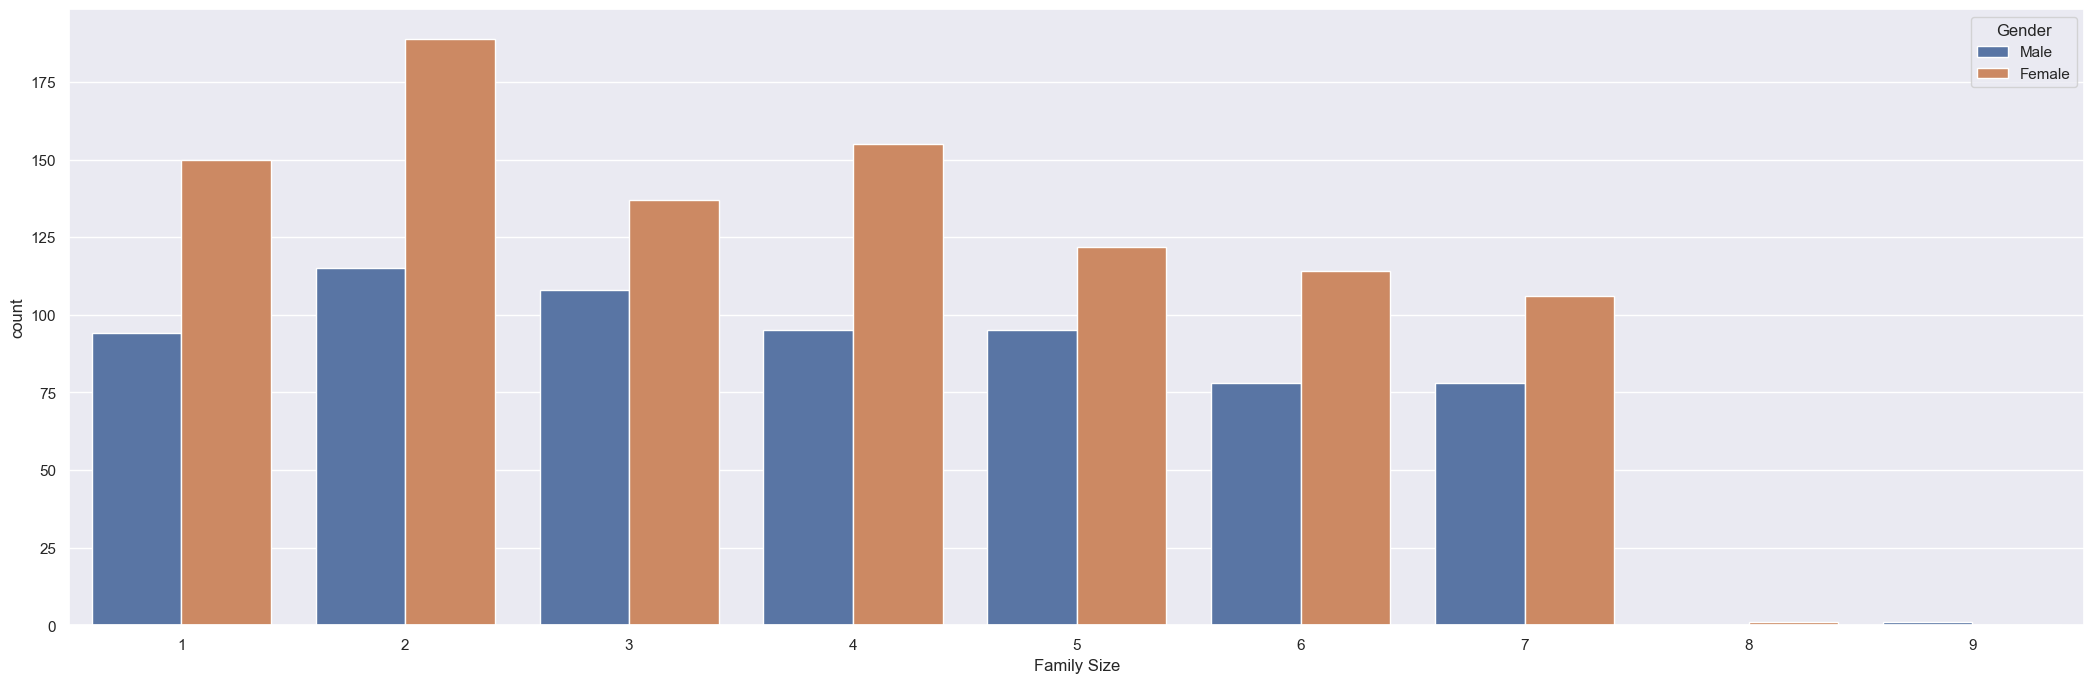

In [23]:
sns.set(rc={'figure.figsize':(26,8)})
ax = sns.countplot(data = df, x = 'Family Size', hue = 'Gender')

## Insights from above graph
#### those family size is 2 they are purchasing more

# Conclusion
## From the above all graphs we can conclude that the people those whose age are in between 26-35 , income in between 75001-100000 , belong to profession artist ,and have family size of 2 members are spending more 
## Mostly Femare are purchasing more than that of male